Making a visualization for the weekend alcohol consumption for students at differnt schools based on family relationships. Scatterplot?

In [2]:
library(tidyverse)
library(repr)
library(janitor)
library(ggplot2)
library(tidymodels)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ──────

In [3]:
# The Portuguese language dataset
data_por <- read_csv("../data/student-por.csv")

# The Math course dataset
data_mat <- read_csv("../data/student-mat.csv")

# Joining the datasets and cleaning the names
data <- full_join(data_mat, data_por) |>
        clean_names()

# Initial view of the dataset
head(data)

Rows: 649 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(school, sex, age, address, famsize, Pstatus, Medu,
Fedu, Mjob, Fjob, reason, guardian, traveltime, studytim

school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,⋯,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


Make a plot where alcohol consumption vs. family relationship

In [4]:
# splitting the student alcohol consumption data
data_split <- initial_split(data, prop = 0.75, strata = dalc)

# training data
data_training <- training(data_split)

# testing data
data_testing <- testing(data_split)

head(data_training)

school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,⋯,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,15,U,LE3,A,3,2,services,other,⋯,4,2,2,1,1,1,0,16,18,19
GP,F,15,U,GT3,T,4,4,teacher,health,⋯,3,3,3,1,2,2,0,10,8,9


In [16]:
fam_plot_data <- data_training |> 
    group_by(school, sex, famsize, famrel, walc, dalc) |> 
    summarize(count = n(), average_famrel = mean(famrel)) |> 
    mutate(school = fct_recode(school, "Gabriel Pereira" = "GP", "Mousinho de Silva" = "MS"),
                      sex = fct_recode(sex, "Female" = "F", "Male" = "M")) 
family_scatter_data <- data_training |> 
    group_by(walc, age, school) |> 
    summarize(final_grade_average = mean(g3, na.rm = TRUE), 
                  average_family_rel = mean(famrel))
family_scatter_data 
    

`summarise()` has grouped output by 'school', 'sex', 'famsize', 'famrel',
'walc'. You can override using the `.groups` argument.
Warning message:
“There were 256 warnings in `mutate()`.
The first warning was:
ℹ In argument: `school = fct_recode(school, `Gabriel Pereira` = "GP", `Mousinho
  de Silva` = "MS")`.
ℹ In group 1: `school = "GP"`, `sex = "F"`, `famsize = "GT3"`, `famrel = 1`,
  `walc = 1`.
Caused by warning:
! Unknown levels in `f`: MS
ℹ Run `dplyr::last_dplyr_warnings()` to see the 255 remaining warnings.”
`summarise()` has grouped output by 'walc', 'age'. You can override using the
`.groups` argument.


walc,age,school,final_grade_average,average_family_rel
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,15,GP,11.647887,4.028169
1,15,MS,12.666667,4.500000
1,16,GP,12.000000,4.000000
1,16,MS,11.652174,3.826087
1,17,GP,12.190476,4.047619
1,17,MS,13.142857,4.071429
1,18,GP,11.051282,4.230769
1,18,MS,10.500000,4.000000
1,19,GP,9.500000,3.750000


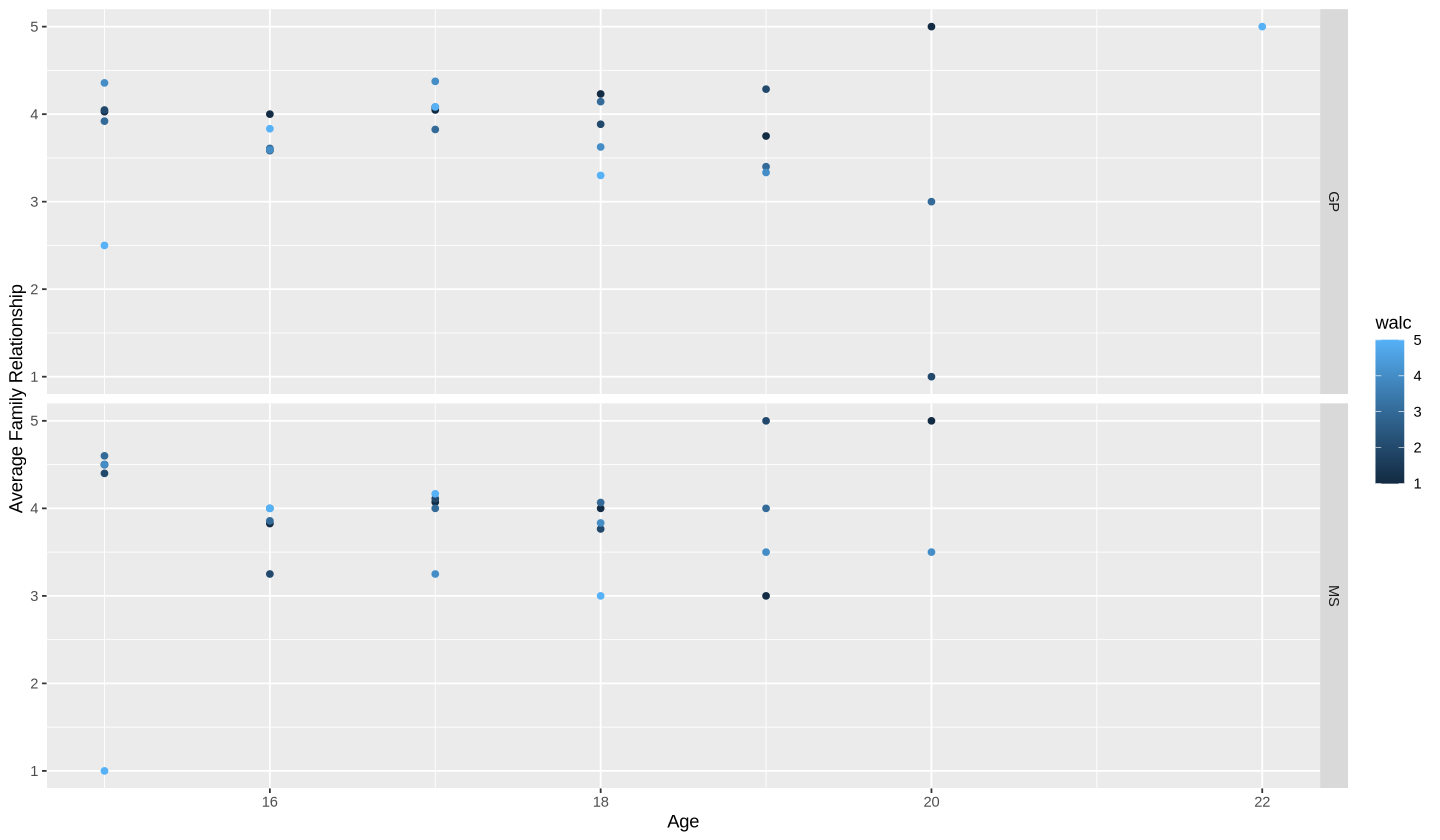

In [35]:
options(repr.plot.heigh = 12, repr.plot.width = 12)
#family_bar_plot <- fam_plot_data |> 
 #   ggplot(aes(x = walc, y = count, fill = famrel)) + 
#        geom_bar(stat = "identity") + 
#        labs(x = "Weekend Alcohol Consumption (very low - very high)", 
#             y = "Number of Students",
#             title = "Students Alcohol Consumption based on family relationship",
#             fill = "Family Relationship (very bad - excellent") +
#        scale_color_brewer(palette = "Dark2") +
#        facet_grid(rows = vars(school), cols = vars(sex))
#        theme(text = element_text(size = 14), 
#              plot.title = element_text(hjust = 0.5, face = "bold")) +
#        scale_fill_brewer(palette = "Accent")
#display.brewer.all()
#family_bar_plot

family_scatter <- family_scatter_data |> 
    ggplot(aes(x = age, y = average_family_rel)) + 
    geom_point(aes(color = walc)) + 
    labs(x = "Age", y = "Average Family Relationship") +
    facet_grid(rows = vars(school))
family_scatter 
    